## Dependencies

In [1]:
import numpy as np
import pandas as pd

from utils import *

## I/O - Initialization

In [67]:
# load the feature dataset as a dataframe
channel_names =  ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", "FT7", "FC3", "FCZ", "FC4", "FT8", "T3", "C3", "Cz", "C4", "T4", "TP7", "CP3", "CPz", "CP4", "TP8", "T5", "P3", "PZ", "P4", "T6", "O1", "Oz" , "O2"]

#channel subsets
hop1 = ["Cz","CP3","CPz","P3"]
hop2 = ["Cz","CP3","CPz","P3","FT7","FC3","FCZ","FC4","C4","CP4","TP8","T5","PZ","T6","O1","Oz","O2"]

csv_file = 'eeg_features.csv'
channel_list = hop2
dataset = data_loader(csv_file)
reduced_dataset = channel_selection(dataset, channel_list)

In [63]:
#calculate accuracy for each channel
for channel in channel_names:
    print(channel)
    models = ['K-NN', 'GBC']
    dataset = data_loader(csv_file)
    reduced_dataset = channel_selection(dataset, [channel])
    data = data_preparation(dataset=reduced_dataset, feature_subset=all_features)
    for model in models:
        model_training(data, model, stats=False, cm=False, verbose=True)

Fp1
Accuracy of K-NN classifier on training set: 0.80024737
Accuracy of K-NN classifier on test set: 0.66666667
Accuracy of GBC classifier on training set: 1.00000000
Accuracy of GBC classifier on test set: 0.71851852
Fp2
Accuracy of K-NN classifier on training set: 0.77983921
Accuracy of K-NN classifier on test set: 0.64938272
Accuracy of GBC classifier on training set: 1.00000000
Accuracy of GBC classifier on test set: 0.68888889
F7
Accuracy of K-NN classifier on training set: 0.82065553
Accuracy of K-NN classifier on test set: 0.72345679
Accuracy of GBC classifier on training set: 1.00000000
Accuracy of GBC classifier on test set: 0.75802469
F3
Accuracy of K-NN classifier on training set: 0.79962894
Accuracy of K-NN classifier on test set: 0.73827160
Accuracy of GBC classifier on training set: 1.00000000
Accuracy of GBC classifier on test set: 0.75061728
Fz
Accuracy of K-NN classifier on training set: 0.81694496
Accuracy of K-NN classifier on test set: 0.76543210
Accuracy of GBC cla

In [38]:
all_features = reduced_dataset.columns[:len(reduced_dataset.columns) - 1]
#result = incremental_training(dataset=dataset, channel_list=channel_list, feature_subset=all_features, models=['K-NN'], mode='feature', save=True)

## P-Value Thresholding

In [44]:
p_all, p_dict = p_value_thresholding(reduced_dataset, feature_subset=all_features)

/Users/efe/Documents/eeg-attention/selection.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(


## Manual Feature Selection

In [68]:
models = ['K-NN', 'GBC']
subset_1 = all_features

data = data_preparation(dataset=reduced_dataset, feature_subset=subset_1)
for model in models:
    model_training(data, model, stats=False, cm=False, verbose=True)

Accuracy of K-NN classifier on training set: 0.94974363
Accuracy of K-NN classifier on test set: 0.90705455
Accuracy of GBC classifier on training set: 1.00000000
Accuracy of GBC classifier on test set: 0.85818182


## Yurteri's Method

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


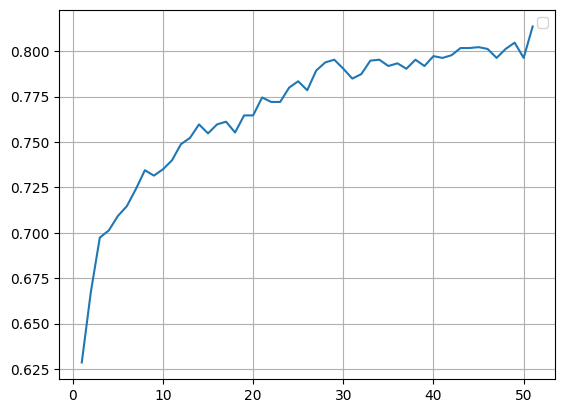

In [53]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1,len(accuracies),len(accuracies)), accuracies)
plt.legend(['GBC'])
plt.savefig('foo.png', bbox_inches='tight')
plt.grid()
plt.show()

In [61]:
p_better = []
for i in range(len(accuracies) - 1):
    delta = accuracies[i+1] - accuracies[i]
    if delta <= 0:
        continue
    else:
        p_better.append(p_all[i])

data = data_preparation(selected_channels=selected_channels, selected_labels=selected_labels, feature_subset=p_better)
for model in models:
    training, test = model_training(data, model, stats=False, cm=False, verbose=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


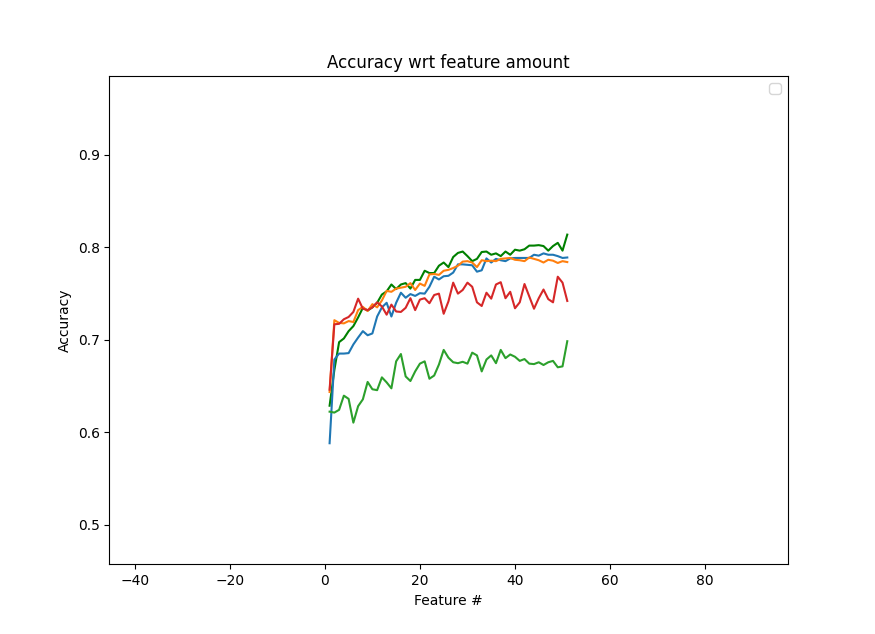

In [72]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1,len(accuracies),len(accuracies)), accuracies)
plt.legend()
plt.savefig('foo.png', bbox_inches='tight')
plt.grid()
plt.show()
plt.legend(['GBC', 'K-NN', 'SVM', 'DTC', 'NN'])